# Types of graphs

## Graph
A graph is a collection of Nodes (could be anything e.g. people, stations, buildings, facilities, ...) and edges, which connect a pair of nodes. 

## Node
= Vertex, connected with their neighbors by edges

## edge
= branch, connection between two nodes, can be written as a tuple of the connected nodes

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

In [51]:
# a graph 
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2), (0, 3), (0, 2), (2, 3)])

# print nodes
list(G.nodes)

[0, 1, 2, 3]

In [52]:
list(G.edges)

[(0, 1), (0, 3), (0, 2), (1, 2), (2, 3)]

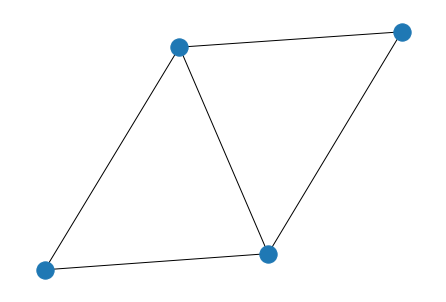

In [71]:
nx.draw(G)

## undirected graphs
If the edges are unsorted tupels, we have an undirected graph. This means we can go from node v to node w by the edge (v,w) and we can go from w to v through the edge (w,v) where (w,v) and (v,w) are the same edge.

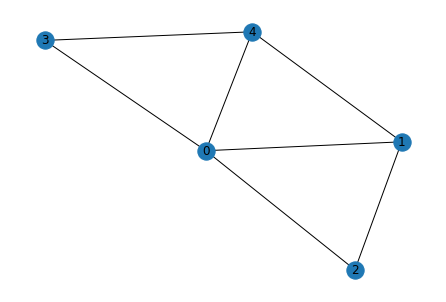

In [9]:
und_G = nx.Graph()

und_G.add_edges_from([(0,1), (1,2), (0,2), (0,3), (0,4), (1,4), (3,4)])
labels = {node: node for node in (list(und_G.nodes))}
nx.draw(und_G, labels = labels)

## directed graphs
In a directed graph the tuples are sorted, and therefore have a direction. It matters which of the nodes is the starting node and which is the end node. The edge (v,w) allows to travel from v to w but not vice versa. The edges in a directed graph can be referred to as arcs or arrows as well. The tail of the arc is the starting node and the head is pointing to the end node.

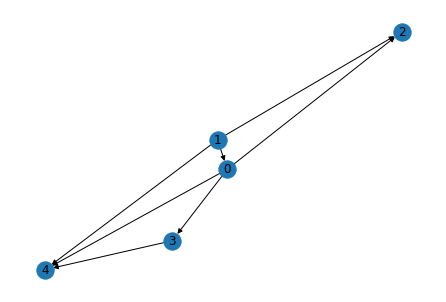

In [12]:
di_graph = nx.DiGraph()
di_graph.add_edges_from([(1,0), (1,2), (0,2), (0,3), (0,4), (1,4), (3,4)])
labels = {node: node for node in (list(und_G.nodes))}
nx.draw(di_graph, labels = labels)

## unweighted graphs
If we just want to show whether two nodes have a relationship and which nodes can be reached from a starting node, we use unweighted graphs, that means, that we just look at yes (1) there is a connection or no (0) there is no connection.

## weighted graphs
If we want to express the strength, distance, similarity, etc. of nodes in a graph we assign weights to the edges.

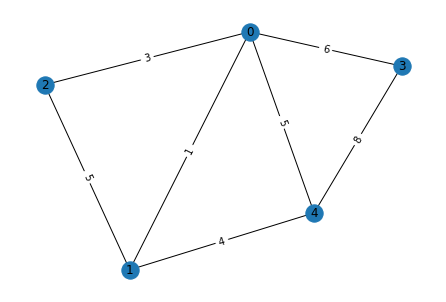

In [29]:
w_und_G = nx.Graph()
w_und_G.add_edges_from([(0,1, {'weight': 1}), (1,2, {'weight': 5}), (0,2, {'weight': 3}), (0,3, {'weight': 6}), (0,4, {'weight': 5}), (1,4, {'weight': 4}), (3,4, {'weight': 8})])
labels = {node: node for node in (list(w_und_G.nodes))}
edge_labels = nx.get_edge_attributes(w_und_G, 'weight')

pos = nx.spring_layout(w_und_G)
nx.draw(w_und_G, pos, labels = labels)
nx.draw_networkx_edge_labels(w_und_G, pos, edge_labels = edge_labels)
plt.show()

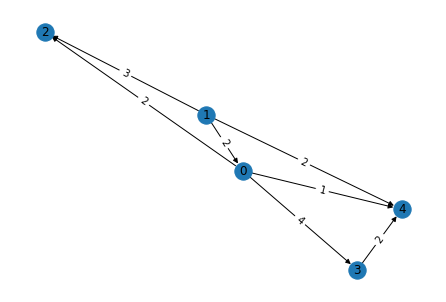

In [34]:
w_Di_graph = nx.DiGraph()
w_Di_graph.add_edges_from([(1,0, {'weight': 2}), (1,2, {'weight': 3}), (0,2, {'weight': 2}), (0,3, {'weight': 4}), (0,4, {'weight': 1}), (1,4, {'weight': 2}), (3,4, {'weight': 2})])
labels = {node: node for node in (list(und_G.nodes))}
edge_label = nx.get_edge_attributes(w_Di_graph, 'weight')

pos = nx.spring_layout(w_Di_graph)
nx.draw(w_Di_graph, pos, labels = labels)
nx.draw_networkx_edge_labels(w_Di_graph, pos, edge_labels = edge_label)
plt.show()

## degree
A node can be described by looking on the number of edges and therefore neighboring nodes. The sum of the edges incident to the node is called the degree. In weighted graphs we sum the weights, in unweighted graphs we sum the number of incident edges. For directed graphs we distinguish the indegree and the outdegree.

The number of edges incident with a vertex v is called the degree of v, denoted as delta(v). Loops are counted twice.

In [40]:
# degree of unweighted undirected graph
und_G.degree # get the degree view, dictionary like node: degree
und_G.degree[0] # degree for one node not in dictionary or view format

4

In [54]:
# total degree of unweighted directed graph
di_graph.degree
di_graph.degree[0]
di_graph.degree()

# indegree
di_graph.in_degree # dictionary like

# outdegree
di_graph.out_degree

OutDegreeView({1: 3, 0: 3, 2: 0, 3: 1, 4: 0})

In [49]:
# degree of weighted undirected graph
w_und_G.degree('weight')[0]
for node in list(w_und_G.nodes):
    print(w_und_G.degree('weight')[node])

4
3
2
2
3


In [62]:
# degree of weighted directed graphs
w_Di_graph.degree('weight')[0]
for node in list(w_Di_graph.nodes):
    print(w_Di_graph.degree('weight')[node])

# indegree 
w_Di_graph.in_degree('weight')[0]
for node in list(w_Di_graph.nodes):
    print(w_Di_graph.in_degree('weight')[node])

# outdegree
w_Di_graph.out_degree('weight')[0]
for node in list(w_Di_graph.nodes):
    print(w_Di_graph.out_degree('weight')[node])

3
4
2
2
3
0
1
2
1
3
3
3
0
1
0


## Vertex degree sum
For all graphs G, the sum of the vertex degrees is twice the number
of edges, that is,
sum(delta(v) = 2 * |E(G)|

In [106]:
# edge set size
nx.number_of_edges(G)

# degree sum
sum_delta = 0
for node in list(G.nodes):
    sum_delta += G.degree[node]
sum_delta

# test whether degree sum equals 2 times the edge set size
sum_delta == 2* nx.number_of_edges(G)

True

The number of vertices with an odd degree must be even, given that the vertex sum must be even due to the factor 2 in the edge set and the sum of even vertex degrees is even as well, because you cannot derive a odd number from a sum of even numbers. Hence, the vertices with odd degree must be even as well.

## degree sequence
The distribution of vertex degrees can provide insight in the organization of a network. The listing of the vertex degrees of a graph gives us the degree sequence. Ordering of degree in descending order gives an ordered degree sequence. If all vertices are of same degree the graph is called regular.

## Regular graph
Each vertex has the same degree. A graph is k-regular if each vertex has a degree of k. For instance a graph with all its vertices having a degree of 3 is a 3-regular graph, often referred to as cubic graph. 

## Havel-Hakimi theorem on graphical degree lists
A list of numbers s = [d1,d2,....,dn] in descending order is said to be graphic if and only if s* = [d*1, d*2,...,d*n1] with n-1 numbers is graphic as well. d*i is di+1 - 1 for i = 1,2,...,d1 or di+1 otherwise. if s* is graphic then s is graphic as well and vice versa.

Two graphs with the same degree sequence need not be the same graph. It is possible to derive several different graphs from one degree sequence.

In [108]:
# check whether a sequence is graphical
s1 = [4, 4, 3, 2, 1]
s2 = [4, 4, 4, 4, 4]
nx.is_graphical(s1)
nx.is_graphical(s2)

True

# complete graph
A graph in which all nodes are adjacent to each other.

36

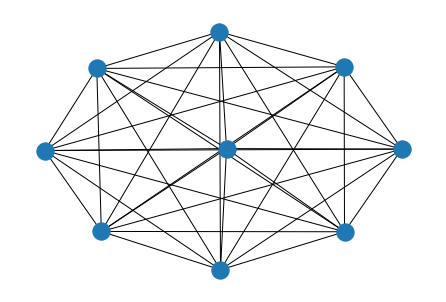

In [66]:
comp_G = nx.complete_graph(9)
nx.draw(comp_G)
comp_G.size()

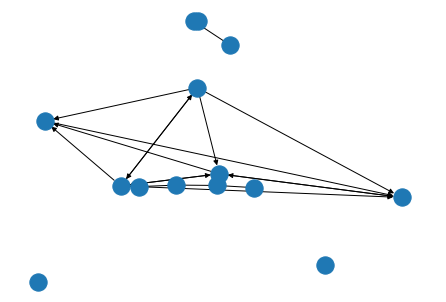

In [77]:
# complement
comp = nx.complement(G)
nx.draw(comp)

comp1 = nx.complement(und_G)
nx.draw(comp1)

comp2 = nx.complement(di_graph)
nx.draw(comp2)

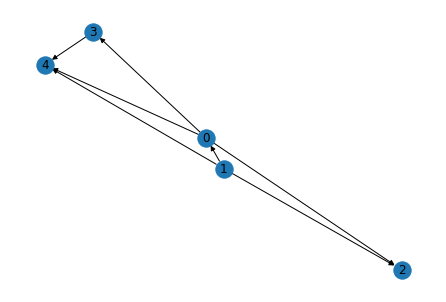

In [81]:
nx.draw(di_graph, with_labels = True)

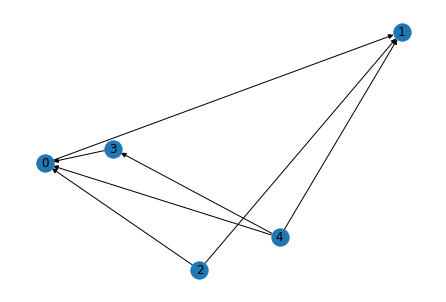

In [80]:
# reverse the directions in a graph
rev = nx.reverse(di_graph)

nx.draw(rev, with_labels = True)

## Subgraphs and line graphs
Subgraphs consist of a subset of edges and vertices of a graph. Induced subgraphs are constructed by taking a subset of veritces and adding each edge form the original graph that connects the subgroup vertices.

Line graphs are constructed by representing each edge as a vertex amd joining two vertices if and only if edges are incident with the same vetex in the original graph.

# Neighboring set
For any graph G and vertex v 2 V(G), the neighbor set N(v) of v is the set of vertices (other than v) adjacent to v, that is
N(v) def= {w element of V(G) |  v != w, it exist an e element E(G) : e = <u, v>} The set of vertices w in G, with w not equal to v, such that there exists anedge e in G that joins v and w.

In [103]:
# adjacency view
G.adj

# adjacent nodes of a node as a list
print(list(G.adj[0]))

# adjacency matrix
adj_mat = nx.adjacency_matrix(G).todense()
adj_mat
adj_mat1 =nx.to_numpy_array(G, weight = None)
adj_mat1
w_adj_mat = nx.to_numpy_array(w_und_G, weight = 'weight')
w_adj_mat

[1, 3, 2]


C:\Users\chiar\AppData\Local\Temp/ipykernel_4012/2708549732.py:8: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_mat = nx.adjacency_matrix(G).todense()


array([[0., 1., 3., 6., 5.],
       [1., 0., 5., 0., 4.],
       [3., 5., 0., 0., 0.],
       [6., 0., 0., 0., 8.],
       [5., 4., 0., 8., 0.]])

## Trees
Networks, in which no cycles exist and between each pair of nodes exists only one unique path. (Skip for now)

## DAG's
Directed acyclic graphs are graphs, which do not contain any cycles, this means, that there is no set of nodes which depends on each other.

// Could nodes in a DAG be code blocks and by walking through them topologically sorted get executed?

## Graph representations